# Loading Data, Imports

In [ ]:
# Dowload and unzip data
%%capture
%%bash
wget "https://www.dropbox.com/s/ormp9hgdyt6kefr/journey-springfield.zip?dl=0" -O journey-springfield.zip 
mkdir data
unzip journey-springfield.zip -d ./data

In [ ]:
# Check if data exists
![ -d "./data/train" ] && echo "Directory ./data/train exists."
![ -d "./data/testset" ] && echo "Directory ./data/testset exists."

Directory ./data/train exists.
Directory ./data/testset exists.


In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets

import matplotlib.pyplot as plt

In [ ]:
# Choose processor
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
# Define simple transforms
transform = transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

In [ ]:
data_dir = './data/'

In [ ]:
# Create image datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), transform) \
                  for x in ['train/simpsons_dataset', 'testset']}

In [ ]:
# Create loaders
BATCH_SIZE = 32
train_loader = DataLoader(image_datasets['train/simpsons_dataset'], batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_loader = DataLoader(image_datasets['testset'], batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

In [ ]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_title(title)

    return ax

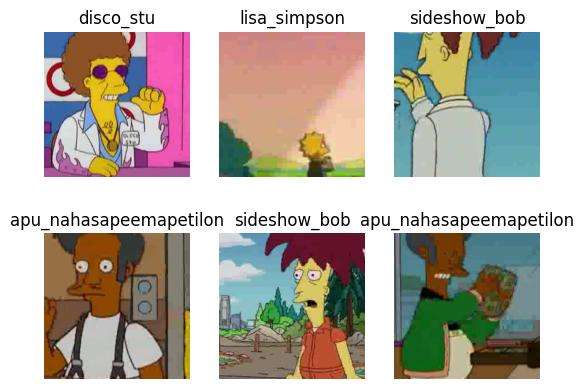

In [ ]:
# Run this to test your data loader
images, labels = next(iter(train_loader))
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3)
imshow(images[0], ax=ax0, normalize=False, title=image_datasets['train/simpsons_dataset'].classes[labels[0]])
imshow(images[1], ax=ax1, normalize=False, title=image_datasets['train/simpsons_dataset'].classes[labels[1]])
imshow(images[2], ax=ax2, normalize=False, title=image_datasets['train/simpsons_dataset'].classes[labels[2]])
imshow(images[3], ax=ax3, normalize=False, title=image_datasets['train/simpsons_dataset'].classes[labels[3]])
imshow(images[4], ax=ax4, normalize=False, title=image_datasets['train/simpsons_dataset'].classes[labels[4]])
imshow(images[5], ax=ax5, normalize=False, title=image_datasets['train/simpsons_dataset'].classes[labels[5]]);